# Análise dos dados pluviométricos de Ariranha - SP

In [8]:
import pandas as pd

Os dados foram extraídos de uma tabela no formato .XLS. 
Os nomes das colunas foram adicionados em formato de tupla(variável colunas) e depois adicionados no Dataframe.

In [9]:
colunas = ('DATA HORA TEMP TEMPMAX TEMPMIN UMIDADE UMIDADEMAX UMIDADEMIN PTO PTOMAX PTOMIN PRESSAO PRESSAOMAX PRESSAOMIN VENTO VENTODIR VENTORAJ RADIACAO CHUVA').split()
df = pd.read_excel('./Dados/SP_Ariranha.xls', header=2)
df.columns = colunas

Amostra dos dados:

In [10]:
df.head()

,DATA,HORA,TEMP,TEMPMAX,TEMPMIN,UMIDADE,UMIDADEMAX,UMIDADEMIN,PTO,PTOMAX,PTOMIN,PRESSAO,PRESSAOMAX,PRESSAOMIN,VENTO,VENTODIR,VENTORAJ,RADIACAO,CHUVA
0,2012-02-16,0.0,23.4,24.3,23.1,83.0,85.0,80.0,20.3,20.6,20.1,955.7,955.7,955.0,0.7,205.0,3.4,NaN,0.0
1,2012-02-16,1.0,22.3,23.6,22.3,88.0,88.0,81.0,20.2,20.3,19.8,955.9,955.9,955.7,1.3,230.0,2.6,NaN,0.0
2,2012-02-16,2.0,21.5,22.3,21.5,89.0,90.0,88.0,19.5,20.2,19.5,956.2,956.2,955.9,0.9,228.0,2.2,NaN,0.2
3,2012-02-16,3.0,21.2,21.6,20.9,89.0,91.0,88.0,19.3,19.5,19.2,956.0,956.2,956.0,1.7,228.0,2.2,NaN,0.0
4,2012-02-16,4.0,20.7,21.2,20.4,90.0,91.0,89.0,18.9,19.3,18.8,955.5,956.0,955.5,1.4,234.0,2.7,NaN,0.0


Gera estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo valores NaN:

In [11]:
df.describe()  #desconsiderar a coluna HORA e VENTODIR

,HORA,TEMP,TEMPMAX,TEMPMIN,UMIDADE,UMIDADEMAX,UMIDADEMIN,PTO,PTOMAX,PTOMIN,PRESSAO,PRESSAOMAX,PRESSAOMIN,VENTO,VENTODIR,VENTORAJ,RADIACAO,CHUVA
count,32790.000000,32719.000000,32712.000000,32712.000000,32718.000000,32712.000000,32712.000000,32718.000000,32712.000000,32712.000000,32722.000000,32716.000000,32716.000000,32721.000000,32721.000000,32702.000000,32771.000000,32730.000000
mean,11.530985,22.863783,23.645445,22.119589,70.687634,74.085748,67.305698,16.342924,17.065887,15.705267,957.445963,957.715879,957.178763,1.773543,173.460927,4.397994,800.971952,0.114390
std,6.915818,5.383017,5.451234,5.281673,20.454593,19.179535,21.266266,4.262083,4.082454,4.404616,13.456942,13.459774,13.455984,1.888135,93.752825,3.321506,1165.814563,1.097433
min,0.000000,2.300000,2.900000,1.800000,12.000000,13.000000,11.000000,-2.900000,-0.700000,-3.500000,943.800000,944.200000,943.700000,0.000000,1.000000,0.000000,-3.540000,0.000000
25%,6.000000,19.700000,20.300000,19.000000,56.000000,61.000000,51.000000,13.300000,14.200000,12.600000,952.400000,952.700000,952.100000,0.000000,88.000000,1.900000,-3.540000,0.000000
50%,12.000000,22.600000,23.200000,22.000000,76.000000,80.000000,72.000000,17.500000,18.200000,16.800000,954.400000,954.700000,954.200000,1.400000,191.000000,4.000000,72.400000,0.000000
75%,17.750000,26.600000,27.600000,25.600000,89.000000,90.000000,86.000000,19.800000,20.300000,19.300000,957.100000,957.400000,956.900000,2.800000,236.000000,6.400000,1427.000000,0.000000
max,23.000000,39.000000,40.000000,38.700000,97.000000,97.000000,97.000000,24.300000,26.300000,23.100000,1024.200000,1024.300000,1024.000000,14.700000,360.000000,24.100000,9961.000000,46.800000


Agrupa os elementos do Dataframe, utilizando a coluna DATA e gera as estatísticas da coluna CHUVA, fazendo assim, a análise da chuva por dia:

In [12]:
df.groupby('DATA').CHUVA.agg(['min','median','max','mean','count']).head()

,min,median,max,mean,count
DATA,,,,,
2012-02-16,0.0,0.0,0.2,0.025000,24
2012-02-17,0.0,0.0,0.2,0.041667,24
2012-02-18,0.0,0.0,0.2,0.058333,24
2012-02-19,0.0,0.0,0.2,0.016667,24
2012-02-20,0.0,0.0,0.2,0.025000,24


Seleciona os dados em um determinado intervalo de tempo e calculando a média da radiação:

In [13]:
dados = df[(df['DATA'] >= '2014-02-01') & (df['DATA'] <= '2014-02-28')].groupby('DATA').RADIACAO.mean()

Ordena os dados e mostra os sete maiores:

In [14]:
dados.sort_values(ascending=False).head(7)

DATA
2014-02-01    1225.970000
2014-02-07    1179.050000
2014-02-04    1157.780000
2014-02-05    1137.163333
2014-02-19    1135.847083
2014-02-08    1105.418750
2014-02-06    1088.355833
Name: RADIACAO, dtype: float64

Cria o gráfico de barras com os dados gerados:

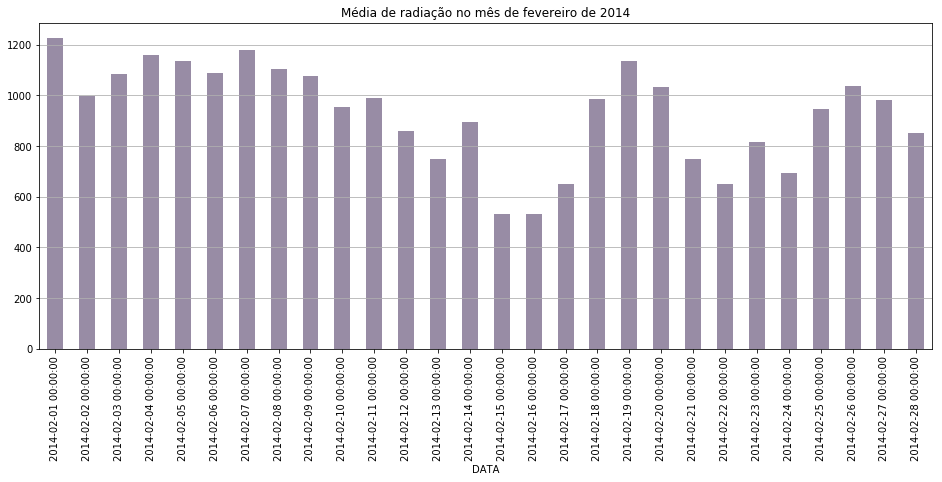

In [32]:
dados.plot(kind='bar', figsize=(16,6),grid=True,title='Média de radiação no mês de fevereiro de 2014', color=(0.2, 0.1, 0.3, 0.5)).xaxis.grid()